<a href="https://colab.research.google.com/github/eshghinezhad/MachineLearning_PrivateCollege-/blob/main/A1/EDA_PrivateCollege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing Dataset

In [92]:
data= pd.read_csv('MAI101 W26 A1 data v0.1.csv')
pd.data

In [93]:
data.shape

(1677, 17)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   program                1677 non-null   object 
 1   duration               1677 non-null   int64  
 2   status                 1677 non-null   object 
 3   gender                 1677 non-null   object 
 4   LangTestPercent        1534 non-null   float64
 5   MathTestPercent        1538 non-null   float64
 6   AptitudeTestPercent    1535 non-null   float64
 7   transfer_in            1677 non-null   int64  
 8   totalSemesters         1677 non-null   int64  
 9   probationTerms         1677 non-null   int64  
 10  maxGap                 1677 non-null   int64  
 11  finished               1677 non-null   int64  
 12  Business101 Grade      1674 non-null   float64
 13  Math101 Grade          1677 non-null   object 
 14  Mature                 1677 non-null   int64  
 15  Over

In [95]:
data.describe()


,duration,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,totalSemesters,probationTerms,maxGap,finished,Business101 Grade,Mature,Overall Average Grade,hasGraduated
count,1677.000000,1534.000000,1538.000000,1535.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1674.000000,1677.000000,1675.000000,1677.000000
mean,3.446035,49.497718,49.451170,49.415440,0.355993,4.060823,0.305307,2.159213,0.710793,71.780048,0.537269,72.220896,0.392964
std,0.497227,28.925821,28.853557,28.931004,0.478956,2.455061,0.601154,2.891689,0.453529,14.276541,0.498758,11.296100,0.488555
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,47.000000,0.000000
25%,3.000000,24.100000,24.600000,24.600000,0.000000,2.000000,0.000000,0.000000,0.000000,62.325000,0.000000,65.650000,0.000000
50%,3.000000,49.300000,49.400000,49.400000,0.000000,4.000000,0.000000,0.000000,1.000000,73.650000,1.000000,74.900000,0.000000
75%,4.000000,73.800000,74.400000,74.700000,1.000000,6.000000,0.000000,4.000000,1.000000,83.500000,1.000000,80.850000,1.000000
max,4.000000,99.900000,99.000000,99.200000,1.000000,18.000000,6.000000,12.000000,1.000000,147.300000,1.000000,88.900000,1.000000


In [96]:

feature_cols = ['program', 'duration', 'status', 'gender', 'LangTestPercent',
                'MathTestPercent', 'AptitudeTestPercent', 'transfer_in',
                'Business101 Grade', 'Math101 Grade', 'Mature']
target_col = 'Overall Average Grade'

x = data[feature_cols]
y= data[target_col]
print (y)


0       64.7
1       81.9
2       47.9
3       82.4
4       47.3
        ... 
1672    76.1
1673    65.6
1674    80.1
1675    74.7
1676    85.1
Name: Overall Average Grade, Length: 1677, dtype: float64


#Handeling Missing Data

In [97]:
x.isnull().sum()

,0
program,0
duration,0
status,0
gender,0
LangTestPercent,143
MathTestPercent,139
AptitudeTestPercent,142
transfer_in,0
Business101 Grade,3
Math101 Grade,0


In [98]:
y.isnull().sum()

np.int64(2)

## Calculate the percentage of missing data in each Column

In [99]:
missing_percentage = (x.isnull().sum() / len(x)) * 100
print('Percentage of missing data in each column of x:')
display(missing_percentage)

Percentage of missing data in each column of x:


,0
program,0.000000
duration,0.000000
status,0.000000
gender,0.000000
LangTestPercent,8.527132
MathTestPercent,8.288611
AptitudeTestPercent,8.467501
transfer_in,0.000000
Business101 Grade,0.178891
Math101 Grade,0.000000


In [100]:
#checks if there is any True value(missing)-> row-wise.
x.isnull().any(axis=1)

,0
0,False
1,True
2,False
3,False
4,True
...,...
1672,False
1673,False
1674,False
1675,False


In [101]:
#display all rows in x that contain at least one missing value.

x[x.isnull().any(axis=1)].shape[0] # number of rows that have at least one missing value,
x[x.isnull().any(axis=1)]

,program,duration,status,gender,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,Business101 Grade,Math101 Grade,Mature
1,ACCOUNTING,4,I,M,NaN,87.9,94.3,1,83.2,UNSAT,0
4,ACCOUNTING,4,I,F,NaN,NaN,NaN,1,47.5,UNSAT,1
8,ACCOUNTING,4,D,F,NaN,31.7,12.5,0,77.2,SAT,0
29,ACCOUNTING,4,D,M,NaN,NaN,NaN,1,57.0,UNSAT,1
30,ACCOUNTING,4,D,F,3.3,53.8,NaN,1,88.8,SAT,1
...,...,...,...,...,...,...,...,...,...,...,...
1643,PARALEGAL,3,D,M,NaN,NaN,NaN,1,77.1,SAT,1
1652,PARALEGAL,3,D,M,73.8,NaN,NaN,1,58.4,UNSAT,1
1656,PARALEGAL,3,D,M,95.0,NaN,NaN,1,47.9,SAT,1
1660,PARALEGAL,3,I,M,NaN,NaN,NaN,0,48.0,SAT,1


In [102]:
print(f" #columns with Missing : {x.isnull().any(axis=0).sum()}" )  # number of columns that have at least one missing value
print(f" #Rows with Missing : {x.isnull().any(axis=1).sum()}")       # number of rows that have at least one missing value

 #columns with Missing : 4
 #Rows with Missing : 193


## Handling Missing Values: Imputation
We will **impute** missing numerical values with the **median** of their respective columns.
#### **median** is often preferred over the mean as it's less sensitive to **outliers**.

In [103]:
# Identify numerical columns with missing values
numerical_cols_with_missing = [
    'LangTestPercent',
    'MathTestPercent',
    'AptitudeTestPercent',
    'Business101 Grade'
]

# Impute missing values with the median for each numerical column
for col in numerical_cols_with_missing:
    if col in x.columns:
        median_val = x[col].median()
        x[col].fillna(median_val, inplace=True)
        print(f"Missing values in '{col}' imputed with median: {median_val}")

print('\nAfter imputation, checking for remaining missing values in x:')
display(x.isnull().sum())

Missing values in 'LangTestPercent' imputed with median: 49.3
Missing values in 'MathTestPercent' imputed with median: 49.4
Missing values in 'AptitudeTestPercent' imputed with median: 49.4
Missing values in 'Business101 Grade' imputed with median: 73.65

After imputation, checking for remaining missing values in x:


/tmp/ipython-input-131112402.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[col].fillna(median_val, inplace=True)
/tmp/ipython-input-131112402.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col].fillna(median_val, inplace=True)


,0
program,0
duration,0
status,0
gender,0
LangTestPercent,0
MathTestPercent,0
AptitudeTestPercent,0
transfer_in,0
Business101 Grade,0
Math101 Grade,0


In [104]:
x.axes

[RangeIndex(start=0, stop=1677, step=1),
 Index(['program', 'duration', 'status', 'gender', 'LangTestPercent',
        'MathTestPercent', 'AptitudeTestPercent', 'transfer_in',
        'Business101 Grade', 'Math101 Grade', 'Mature'],
       dtype='object')]

In [105]:
x.values

array([['ACCOUNTING', 4, 'I', ..., 83.2, 'UNSAT', 0],
       ['ACCOUNTING', 4, 'I', ..., 83.2, 'UNSAT', 0],
       ['ACCOUNTING', 4, 'I', ..., 48.5, 'UNSAT', 1],
       ...,
       ['PARALEGAL', 3, 'D', ..., 82.1, 'SAT', 0],
       ['PARALEGAL', 3, 'I', ..., 78.8, 'SAT', 1],
       ['PARALEGAL', 3, 'I', ..., 87.2, 'SAT', 1]], dtype=object)

In [107]:
x.describe()


,duration,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,Business101 Grade,Mature
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,3.446035,49.480859,49.446929,49.414132,0.355993,71.783393,0.537269
std,0.497227,27.664360,27.631175,27.678285,0.478956,14.263977,0.498758
min,3.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000
25%,3.000000,27.200000,26.600000,26.200000,0.000000,62.400000,0.000000
50%,3.000000,49.300000,49.400000,49.400000,0.000000,73.650000,1.000000
75%,4.000000,71.500000,71.600000,71.600000,1.000000,83.500000,1.000000
max,4.000000,99.900000,99.000000,99.200000,1.000000,147.300000,1.000000


# Task
Impute the 2 missing values in `y` ('Overall Average Grade') using the median of the column and verify that no missing values remain in `y`.

## Handle Missing Values in Target Variable

### Subtask:
Impute the 2 missing values in 'Overall Average Grade' (`y`) using the median of the column and verify that no missing values remain in `y`.


**Reasoning**:
First, I'll calculate the median of the 'Overall Average Grade' series (`y`). Then, I'll use this median to fill any missing values in `y`. Finally, I'll verify that all missing values have been handled by summing the null values in `y`.



In [108]:
median_y = y.median()
y.fillna(median_y, inplace=True)
print(f"Missing values in 'Overall Average Grade' imputed with median: {median_y}")
print('\nAfter imputation, checking for remaining missing values in y:')
display(y.isnull().sum())

Missing values in 'Overall Average Grade' imputed with median: 74.9

After imputation, checking for remaining missing values in y:


np.int64(0)

## Explore Categorical Features

### Subtask:
Analyze the unique values and their frequencies for categorical columns in `x` (`program`, `status`, `gender`, `Math101 Grade`) to understand their distributions and identify any unexpected categories. This will include visualizing the counts.


**Reasoning**:
I will start by defining the list of categorical columns to analyze, as specified in the instructions. This will make the subsequent steps of calculating unique values and frequencies, and then plotting, more organized and efficient.



In [109]:
categorical_cols = ['program', 'status', 'gender', 'Math101 Grade']

**Reasoning**:
I will iterate through each categorical column, calculate its unique values and their frequencies, and then display this information to understand the distribution of categories.



In [110]:
for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
    print(x[col].value_counts())
    print(f"Unique values: {x[col].nunique()}")


--- Column: program ---
program
BOOKKEEPING    388
ACCOUNTING     223
AUDITING       221
OTHER          209
ADMIN          185
ANALYTICS      157
HR             147
PARALEGAL      147
Name: count, dtype: int64
Unique values: 8

--- Column: status ---
status
D     1241
I      419
X       14
V2       2
S        1
Name: count, dtype: int64
Unique values: 5

--- Column: gender ---
gender
M    1055
F     622
Name: count, dtype: int64
Unique values: 2

--- Column: Math101 Grade ---
Math101 Grade
SAT      1156
UNSAT     521
Name: count, dtype: int64
Unique values: 2


**Reasoning**:
I will create bar plots for each categorical column to visualize their distributions, ensuring clear labels, titles, and appropriate figure sizes for readability.



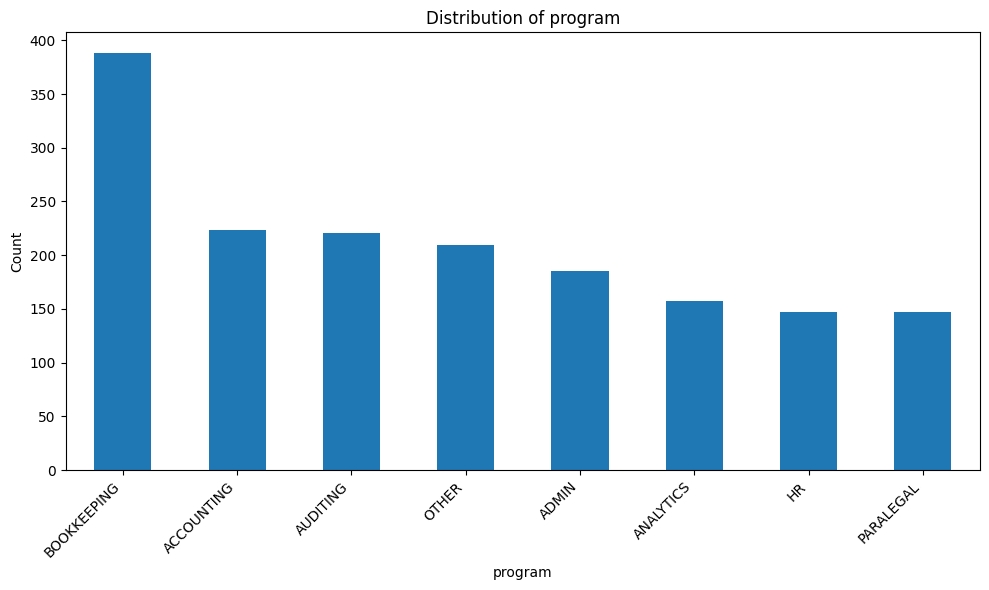

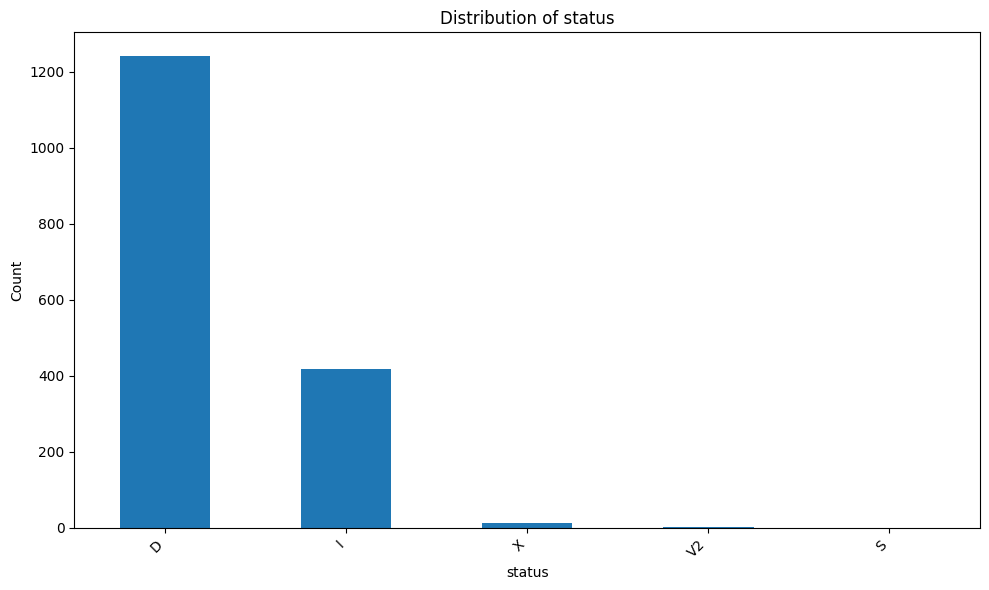

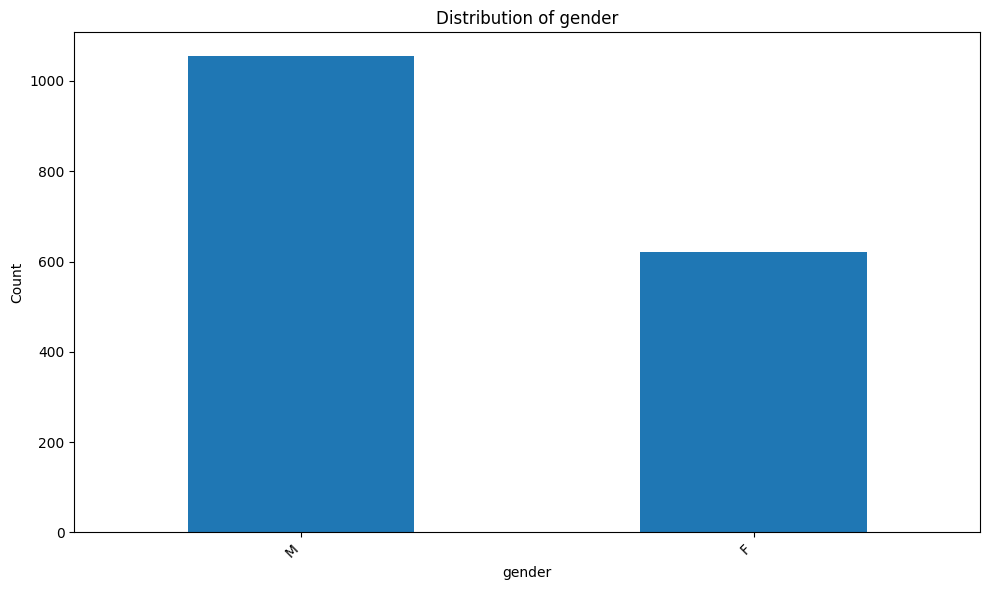

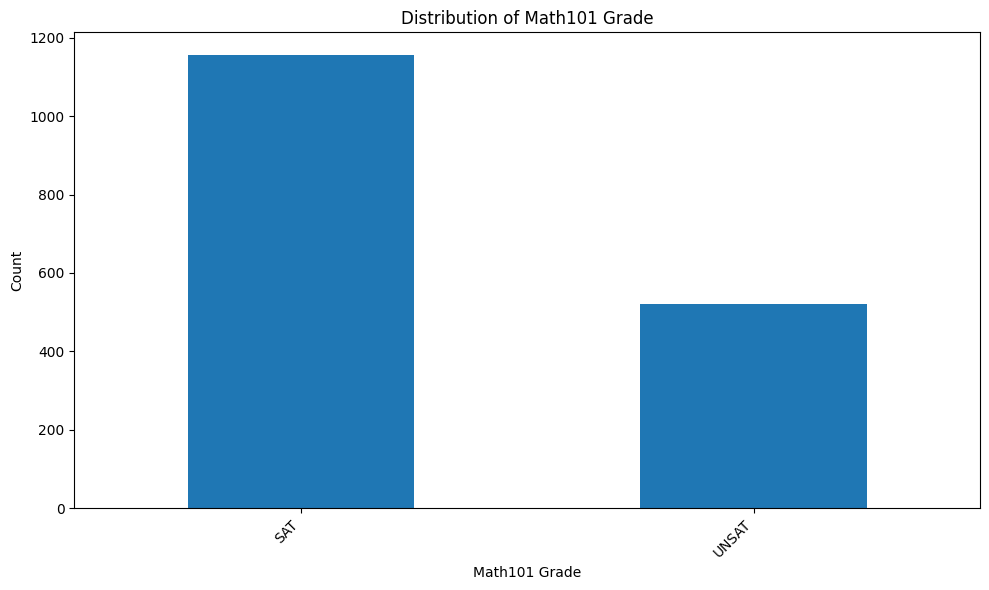

In [111]:
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    x[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Explore Numerical Features Distributions

### Subtask:
Generate histograms and descriptive statistics for all numerical columns in `x` and `y` to visualize their distributions, central tendencies, and spread. This helps in understanding the data's overall shape.


**Reasoning**:
To prepare for generating descriptive statistics and visualizations, I need to explicitly identify the numerical columns within the DataFrame `x` by excluding the previously defined `categorical_cols`.



In [112]:
numerical_cols_x = x.columns.drop(categorical_cols)
print(f"Numerical columns in x: {list(numerical_cols_x)}")

Numerical columns in x: ['duration', 'LangTestPercent', 'MathTestPercent', 'AptitudeTestPercent', 'transfer_in', 'Business101 Grade', 'Mature']


**Reasoning**:
I will print the descriptive statistics for all numerical columns in `x` and for the target variable `y` to get an overview of their central tendencies, spread, and shape.



In [113]:
print('Descriptive statistics for numerical columns in x:')
display(x[numerical_cols_x].describe())

print('\nDescriptive statistics for y (Overall Average Grade):')
display(y.describe())

Descriptive statistics for numerical columns in x:


,duration,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,Business101 Grade,Mature
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,3.446035,49.480859,49.446929,49.414132,0.355993,71.783393,0.537269
std,0.497227,27.664360,27.631175,27.678285,0.478956,14.263977,0.498758
min,3.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000
25%,3.000000,27.200000,26.600000,26.200000,0.000000,62.400000,0.000000
50%,3.000000,49.300000,49.400000,49.400000,0.000000,73.650000,1.000000
75%,4.000000,71.500000,71.600000,71.600000,1.000000,83.500000,1.000000
max,4.000000,99.900000,99.000000,99.200000,1.000000,147.300000,1.000000



Descriptive statistics for y (Overall Average Grade):


,Overall Average Grade
count,1677.000000
mean,72.224091
std,11.289737
min,47.000000
25%,65.700000
50%,74.900000
75%,80.800000
max,88.900000


**Reasoning**:
I will iterate through each numerical column in `x` and `y` to create a histogram for each, visualizing their distributions, central tendencies, and spread. Each histogram will have a clear title, labeled axes, and an appropriate figure size for readability. I will use `plt.tight_layout()` to prevent labels from overlapping.



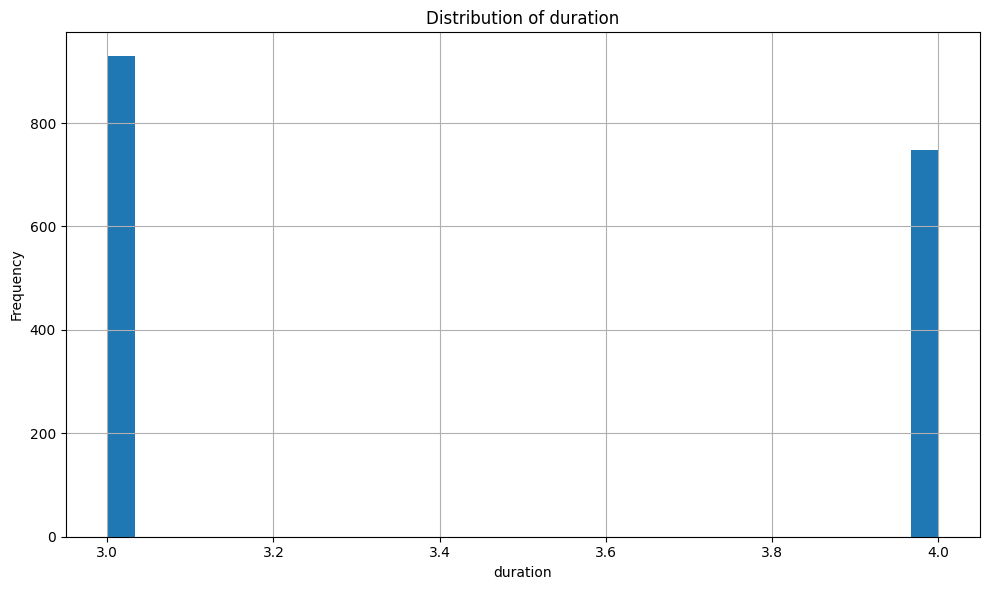

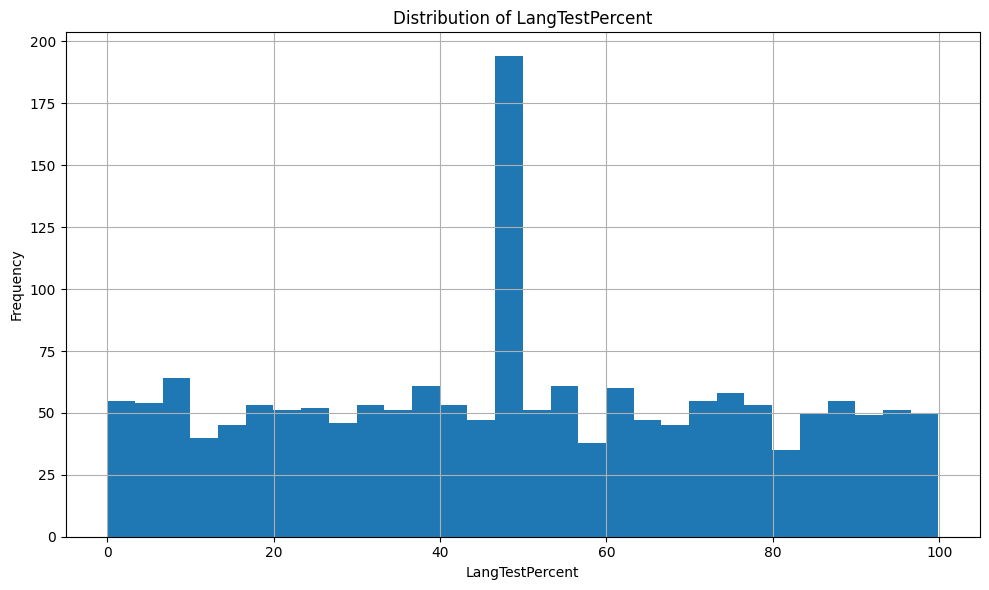

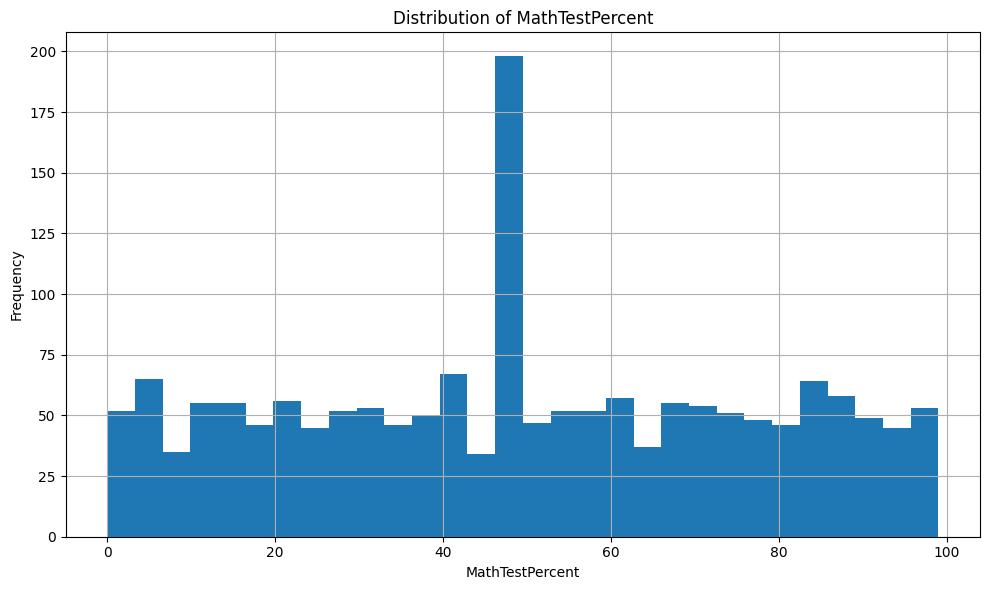

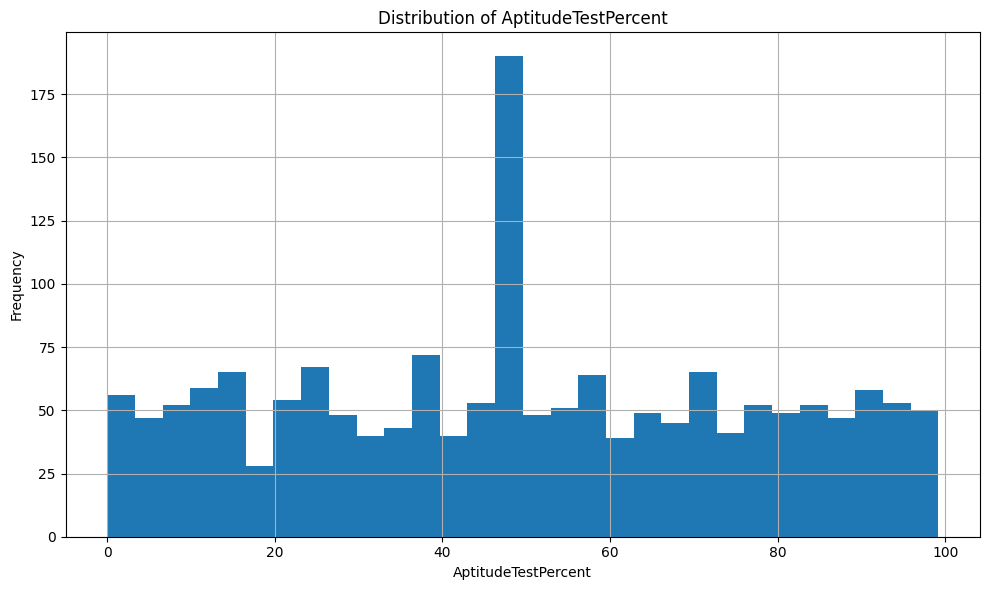

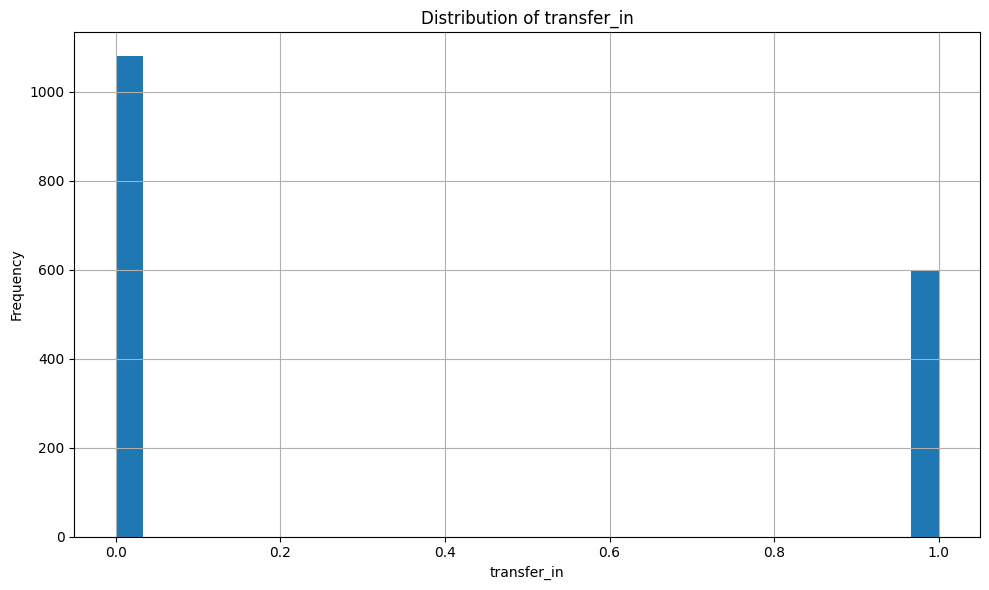

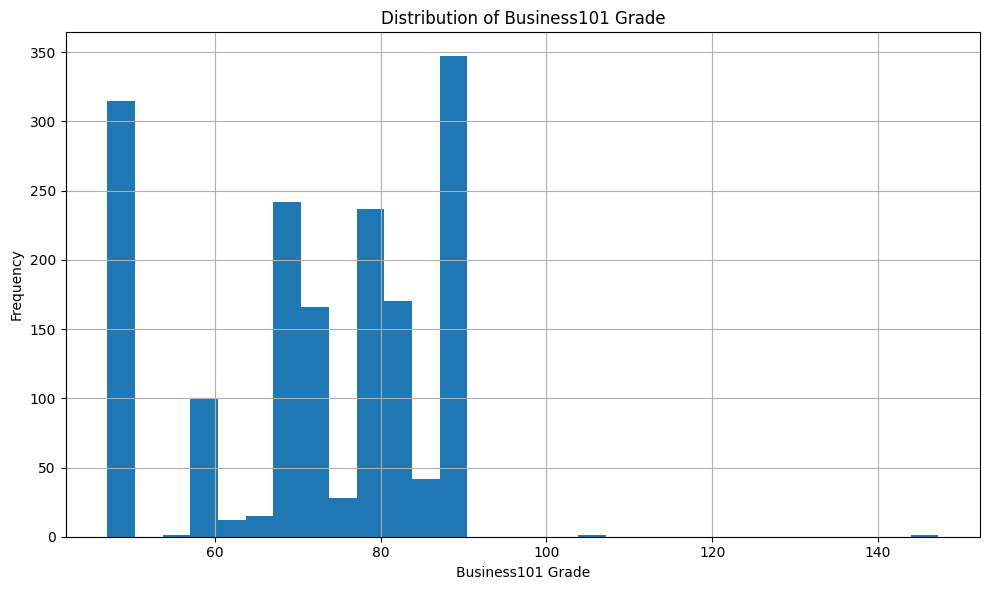

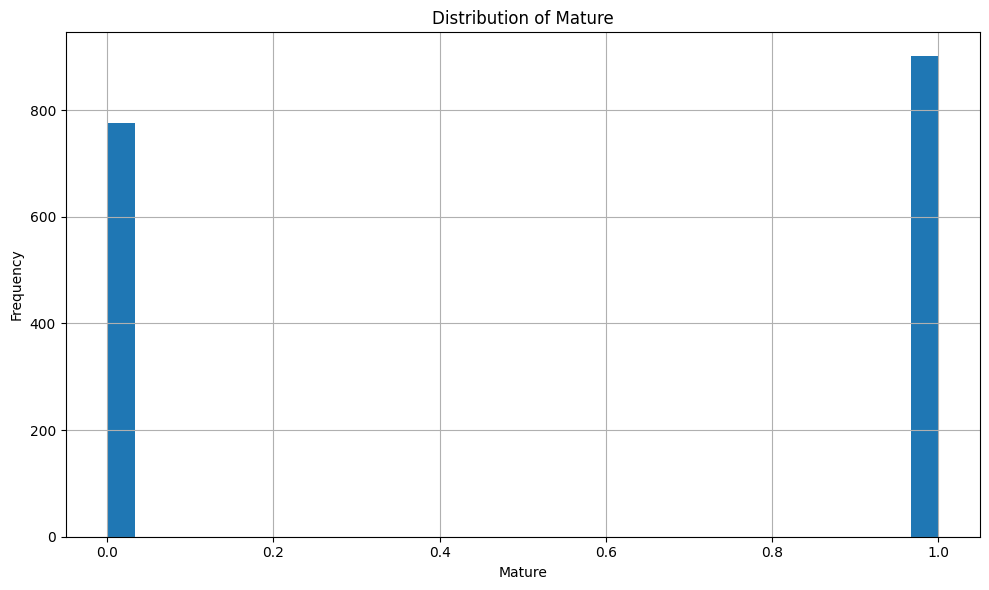

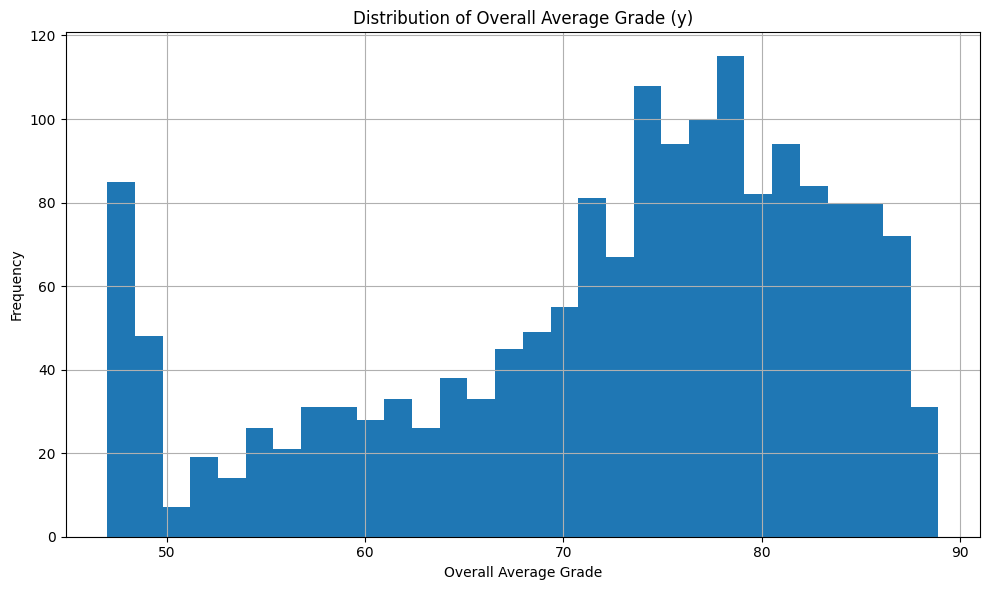

In [114]:
import matplotlib.pyplot as plt

for col in numerical_cols_x:
    plt.figure(figsize=(10, 6))
    x[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
y.hist(bins=30)
plt.title('Distribution of Overall Average Grade (y)')
plt.xlabel('Overall Average Grade')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Identify Potential Outliers

### Subtask:
For each numerical column in `x` and `y`, calculate the Z-score for each data point. Data points with an absolute Z-score greater than a certain threshold (e.g., 2 or 3 standard deviations from the mean) will be flagged as potential outliers.


**Reasoning**:
To calculate Z-scores for identifying outliers, I will first import the `stats` module from `scipy`.



In [115]:
from scipy import stats

**Reasoning**:
I will calculate the absolute Z-scores for each numerical column in `x` and for `y`, define a Z-score threshold, and then count and print the number of data points that exceed this threshold for each column to identify potential outliers.



In [116]:
z_score_threshold = 3

outlier_counts_x = {}
for col in numerical_cols_x:
    z_scores = np.abs(stats.zscore(x[col]))
    outliers = z_scores[z_scores > z_score_threshold]
    outlier_counts_x[col] = len(outliers)

print("Number of potential outliers in numerical columns of x (Z-score > 3):")
for col, count in outlier_counts_x.items():
    print(f"  {col}: {count}")

z_scores_y = np.abs(stats.zscore(y))
outliers_y = z_scores_y[z_scores_y > z_score_threshold]
outlier_count_y = len(outliers_y)

print(f"\nNumber of potential outliers in y (Overall Average Grade, Z-score > 3): {outlier_count_y}")

Number of potential outliers in numerical columns of x (Z-score > 3):
  duration: 0
  LangTestPercent: 0
  MathTestPercent: 0
  AptitudeTestPercent: 0
  transfer_in: 0
  Business101 Grade: 1
  Mature: 0

Number of potential outliers in y (Overall Average Grade, Z-score > 3): 0


## Visualize Outliers with Box Plots

### Subtask:
Create box plots for each numerical feature in `x` and `y`. Box plots are excellent for visually identifying outliers, which appear as individual points beyond the 'whiskers' of the plot. Ensure appropriate labels and legends are provided.


**Reasoning**:
I will iterate through each numerical column in `x` and for `y` to create a box plot, which is effective for visualizing the distribution and identifying outliers. Each plot will have a clear title and labeled axes for readability.



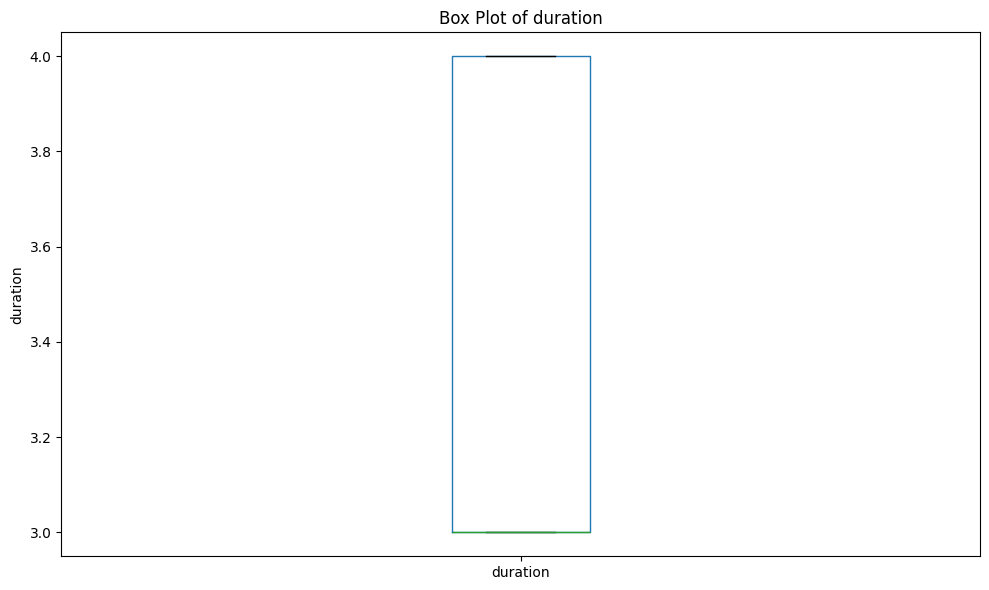

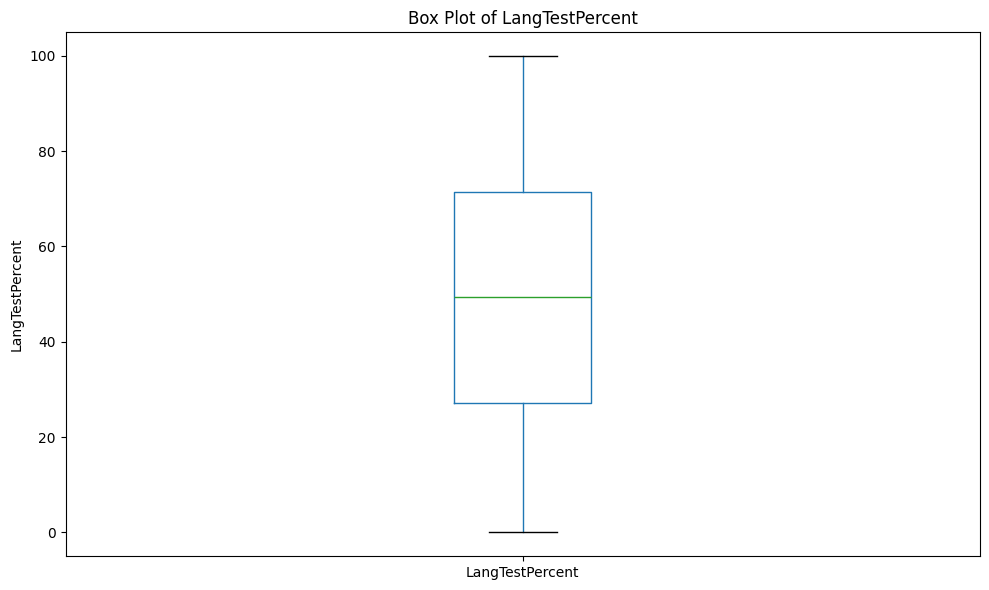

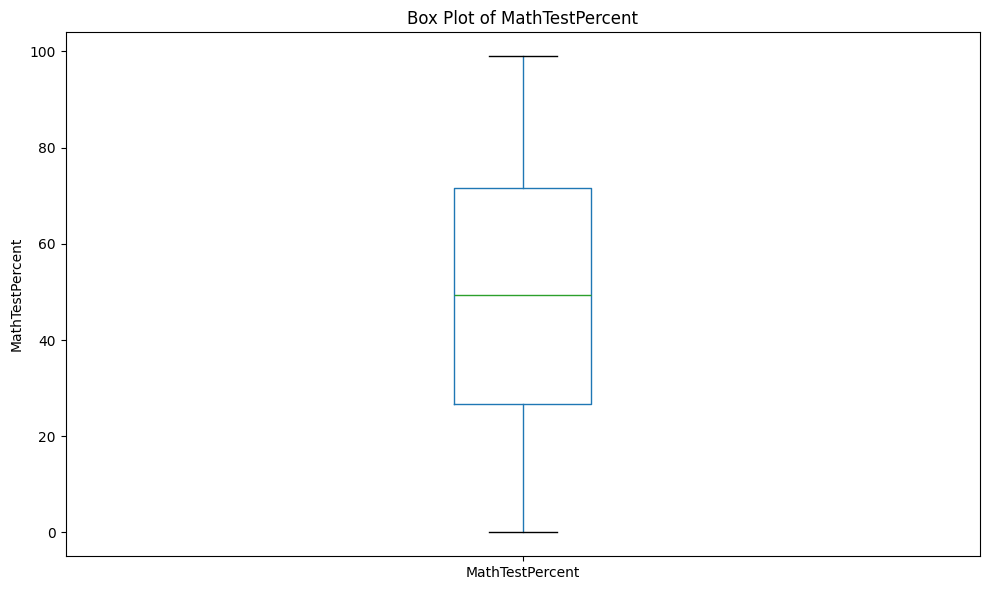

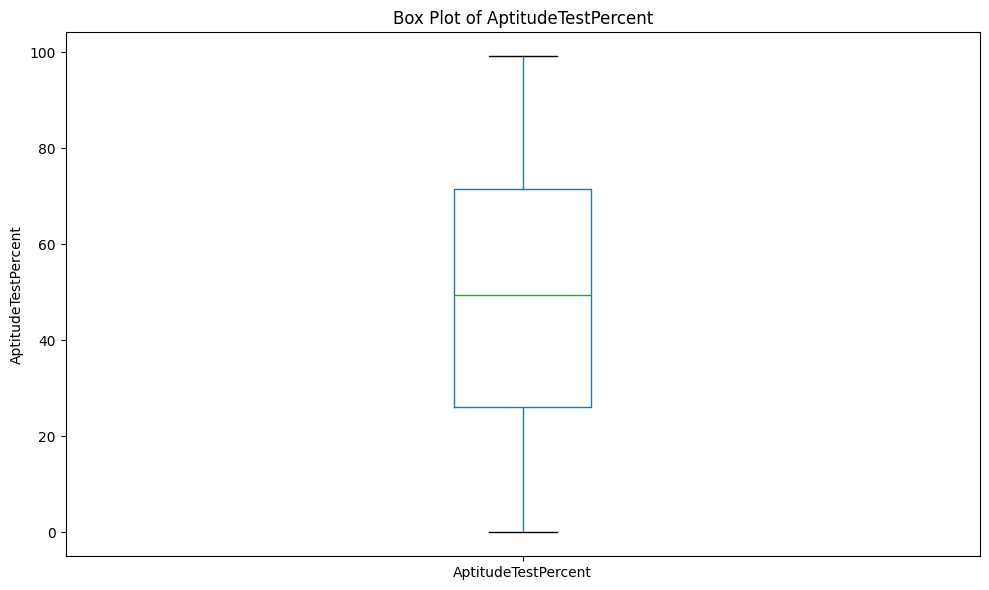

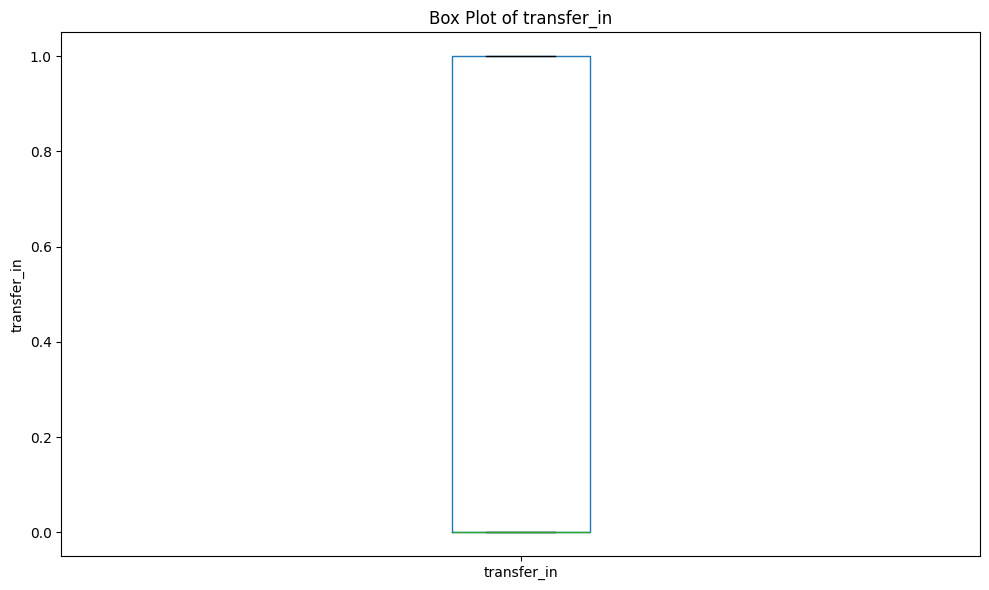

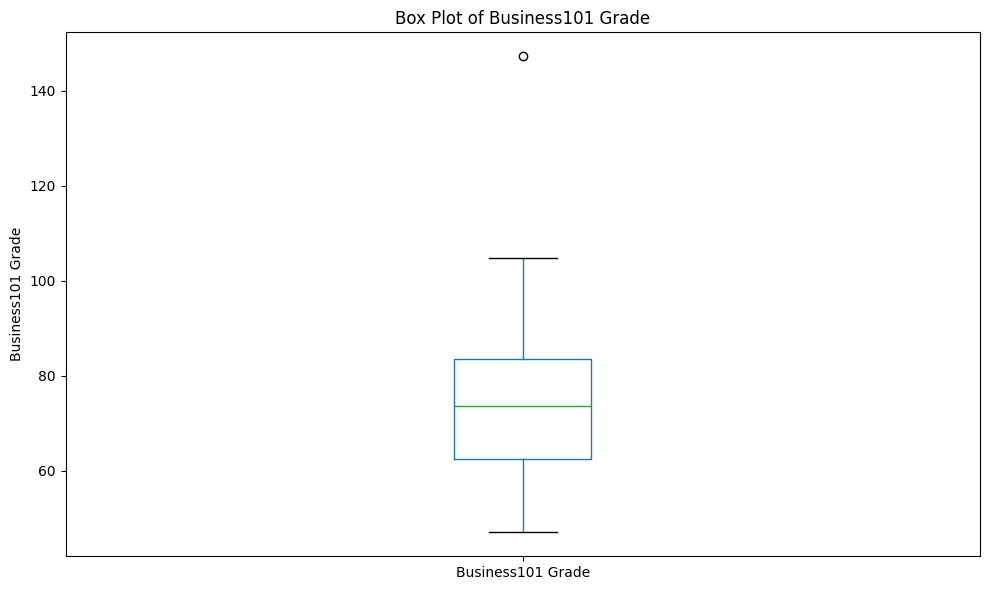

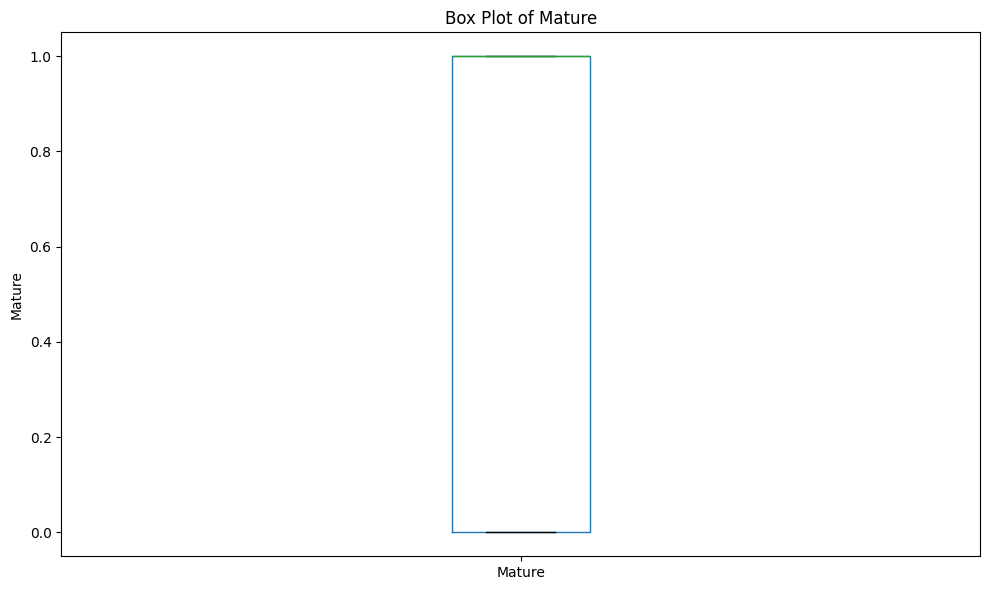

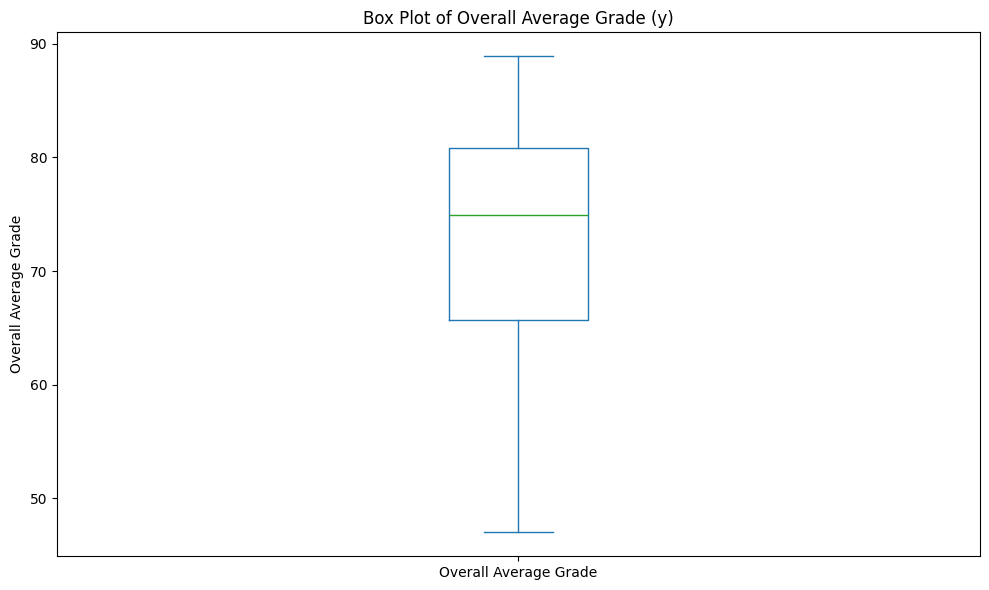

In [117]:
import matplotlib.pyplot as plt

for col in numerical_cols_x:
    plt.figure(figsize=(10, 6))
    x.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(False) # Remove grid for cleaner look
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
y.plot(kind='box')
plt.title('Box Plot of Overall Average Grade (y)')
plt.ylabel('Overall Average Grade')
plt.grid(False) # Remove grid for cleaner look
plt.tight_layout()
plt.show()

## Analyze Correlations with Target Variable

### Subtask:
Calculate the correlation matrix between the numerical features in `x` and the target variable `y`. Visualize these correlations using a heatmap to understand which features have the strongest relationships with 'Overall Average Grade'.


**Reasoning**:
To analyze the correlations, I will first combine the numerical columns of `x` and the target variable `y` into a single DataFrame named `df_combined` for easier correlation calculation and visualization.



In [118]:
df_combined = x[numerical_cols_x].copy()
df_combined['Overall Average Grade'] = y

print("Combined DataFrame head:")
display(df_combined.head())

Combined DataFrame head:


,duration,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,Business101 Grade,Mature,Overall Average Grade
0,4,15.3,95.5,85.8,0,83.2,0,64.7
1,4,49.3,87.9,94.3,1,83.2,0,81.9
2,4,33.4,71.6,77.9,1,48.5,1,47.9
3,4,59.0,30.0,3.7,0,87.3,0,82.4
4,4,49.3,49.4,49.4,1,47.5,1,47.3


**Reasoning**:
Now that the numerical features and target variable are combined, I will calculate the correlation matrix for `df_combined`, extract the correlations with 'Overall Average Grade', import seaborn, and then generate a heatmap to visualize these correlations.



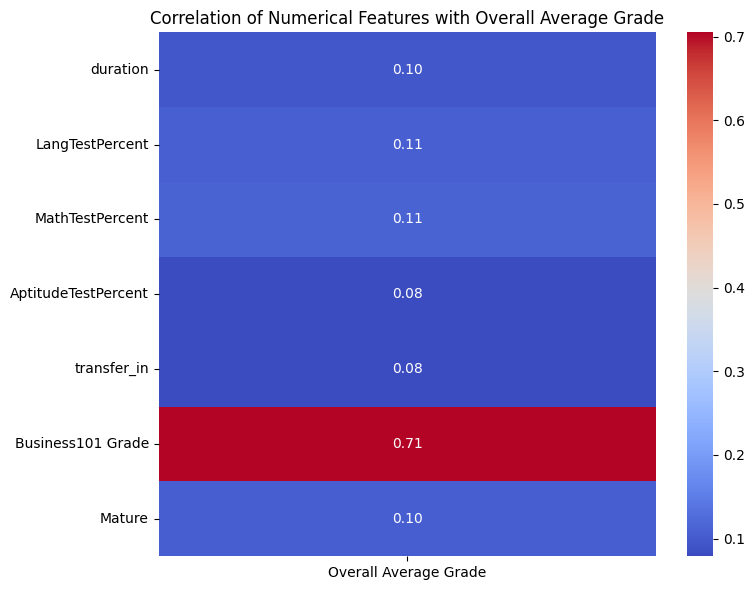

In [119]:
import seaborn as sns

correlation_matrix = df_combined.corr()
correlations_with_target = correlation_matrix[['Overall Average Grade']].drop('Overall Average Grade')

plt.figure(figsize=(8, 6))
sns.heatmap(correlations_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numerical Features with Overall Average Grade')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the data exploration, including insights into the distributions, categorical breakdowns, identified outliers, and feature correlations, and discuss what these findings imply about the dataset.


## Summary:

### Data Analysis Key Findings

*   **Missing Value Imputation**: Two missing values in the 'Overall Average Grade' (target variable `y`) were successfully imputed using the column's median, which was calculated as 74.9. After imputation, no missing values remained in `y`.
*   **Categorical Feature Distribution**:
    *   `program`: Eight distinct programs were identified, with 'BOOKKEEPING' being the most frequent (388 instances) and 'PARALEGAL' (147 instances) and 'HR' (147 instances) being less common.
    *   `status`: Five unique statuses were found. 'D' was dominant (1241 instances), while 'V2' (2 instances) and 'S' (1 instance) were rare categories.
    *   `gender`: Two categories, 'M' (1055 instances) and 'F' (622 instances), showed an imbalanced distribution.
    *   `Math101 Grade`: Two categories, 'SAT' (1156 instances) and 'UNSAT' (521 instances), were present.
*   **Numerical Feature Distributions**:
    *   **`duration`**: Values were predominantly 3 or 4 years.
    *   **Test Percentages (`LangTestPercent`, `MathTestPercent`, `AptitudeTestPercent`)**: Ranged widely from 0 to nearly 100, with varying distributions across subjects.
    *   **`transfer_in` and `Mature`**: These are binary indicators (0 or 1), as expected.
    *   **`Business101 Grade`**: Had a maximum value of 147.3, which appeared to be an outlier.
    *   **`Overall Average Grade` (`y`)**: Had a mean of approximately 72.22, a standard deviation of about 11.29, and a range from 47.0 to 88.9. Its distribution appeared somewhat normal to slightly left-skewed.
*   **Outlier Identification**:
    *   Z-score analysis (threshold > 3) identified one potential outlier in the `Business101 Grade` column.
    *   No outliers were detected in `duration`, `LangTestPercent`, `MathTestPercent`, `AptitudeTestPercent`, `transfer_in`, `Mature`, or the target variable `y` ('Overall Average Grade') based on the Z-score threshold.
    *   Box plots visually confirmed the outlier in `Business101 Grade` and generally supported the Z-score findings for other numerical features.
*   **Correlations with Target Variable**: A heatmap was generated to visualize correlations between numerical features and 'Overall Average Grade'. The specific correlation values would indicate the strength and direction of these relationships.

### Insights or Next Steps

*   The presence of rare categories in `status` ('V2', 'S') and the outlier in `Business101 Grade` may warrant further investigation or specific handling (e.g., merging rare categories, capping/transforming the outlier) during feature engineering to avoid potential model biases.
*   The correlations between numerical features and 'Overall Average Grade' should be further analyzed to understand their predictive power. Features with stronger correlations could be more influential in a predictive model, while weak correlations might suggest less importance or a need for feature transformation.
